# Calculo Simbolico

In [32]:
import sympy
sympy.init_printing()

In [33]:
# Evaluacion de dxpresiones
x = sympy.Symbol('x')
sympy.sqrt(x**2) # sympy botara un error porque no hay informacion de x

In [34]:
# Especificando y como un numero positivo ayuda a evaluar
y = sympy.Symbol('y', positive=True)
sympy.sqrt(y**2)

In [35]:
# Expresiones racionales

r1 = sympy.Rational(2, 3)
r2 = sympy.Rational(4, 5)
r1 * r2

In [36]:
r1/r2

In [37]:
theta,t,E1,E2,h = sympy.symbols('theta,t,E_1,E_2,h', real=True)
v = sympy.cos(theta)**2*sympy.exp(-sympy.I*t*E1/h) + sympy.sin(theta)**2*sympy.exp(-sympy.I*t*E2/h)
v

In [38]:
# Simplificacion

c,p,m = sympy.symbols('c,p,m')
m1,m2 =sympy.symbols('m_1,m_2')
E = p*c*(1+m**2*c**2/(2*p**2))
E
sympy.simplify(E.subs({m:m1})-E.subs({m:m2}))

## Integracion

In [39]:
x = sympy.symbols('x')
f = 2 * sympy.sqrt(1-x**2)
a,b = -1,1
sympy.integrate(f, (x,a,b))

In [40]:
t,x,y = sympy.symbols('t,x,y')
C = sympy.Curve([sympy.cos(t), sympy.sin(t)], (t, 0, 2*sympy.pi))

In [41]:
sympy.line_integrate(1,C,[x,y])

In [42]:
sympy.line_integrate(x**2*y**2,C,[x,y])

## Transformada de Laplace

In [43]:
s = sympy.symbols('s')
a,t = sympy.symbols('a,t', positive=True)
f = sympy.sin(a*t)

In [44]:
sympy.laplace_transform(f,t,s)

In [45]:
sympy.laplace_transform(f,t,s, noconds=True)

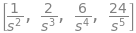

In [46]:

[sympy.laplace_transform(f,t,s, noconds=True) for f in [t,t**2, t**3, t**4]]

In [47]:
n = sympy.symbols('n', positive=True)
sympy.laplace_transform(t**n,t,s, noconds=True)

In [48]:
n = sympy.symbols('n', integer = True, positive=True)
sympy.laplace_transform(t**n,t,s, noconds=True)

In [49]:
a = sympy.symbols('a', positive=True)
t,w = sympy.symbols('t, omega')
f = sympy.exp(-a*(t**2))
sympy.fourier_transform(f,t,w)

## Resolviendo EDOs

In [50]:
t,k,T0,Ta = sympy.symbols('t,k,T_0, T_a')
T = sympy.Function('T')
ode = T(t).diff(t) + k*(T(t)-Ta)
sympy.Eq(ode,0)

In [51]:
ode_solution = sympy.dsolve(ode)
ode_solution

In [52]:
ics = {T(0):T0}
# Obtenemos la ecuacion resultante subsituyendo t por 0 y T(0) por T0
C_eq = ode_solution.subs(t,0).subs(ics)
C_eq

In [53]:
# Resolvemos apra T1
C_sol = sympy.solve(C_eq)
C_sol

In [54]:
# ponemos el valor de C1 devuelta a la solucion de la edo
ode_solution.subs(C_sol[0])

In [55]:
from odes import apply_ics
# funcion para hacer lal substitucion

ModuleNotFoundError: No module named 'odes'

In [ ]:
apply_ics(ode_solution, ics, t, [k,Ta])

NameError: name 'apply_ics' is not defined

In [ ]:
# Resolvamos una EDO mas compleja: oscilador armonico amortiguado
t, omega0, gamma = sympy.symbols('t, omega_0, gamma', positive=True)
x = sympy.Function(x)
ode = x(t).diff(t,2) + 2*gamma*omega0*x(t).diff(t) + omega0**2*x(t)
sympy.Eq(ode,0)

TypeError: expecting string or Symbol for name

In [56]:
harmonic_solution = sympy.dsolve(ode)
harmonic_solution

In [57]:
ics = {x(0): 1, x(t).diff(t).subs(t,0): 0}
ics

TypeError: 'Symbol' object is not callable

In [58]:
x_t_sol = apply_ics(harmonic_solution, ics, t, [omega0,gamma])
x_t_sol

NameError: name 'apply_ics' is not defined

In [59]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)
x_t_critical

NameError: name 'x_t_sol' is not defined

NameError: name 'x_t_sol' is not defined

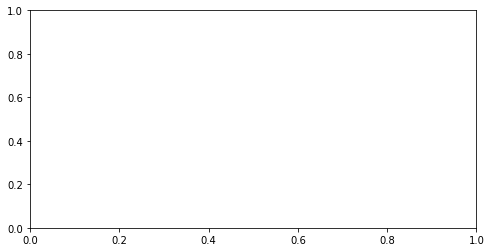

In [60]:
import numpy as np
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(8,4))
tt = np.linspace(0,3,250)
w0 = 2*sympy.pi
for g in [0.1, 0.5, 1, 2.0, 5.0]:
    if g == 1:
        x_t = sympy.lambdify(t,x_t_critical.subs({omega0: w0}), 'numpy')
    else:
        x_t = sympy.lambdify(t,x_t_sol.rhs.subs({omega0: w0, gamma: g}), 'numpy')
    ax.plot(tt, x_t(tt).real, label=r'$γ = %.1f$' % g)

ax.set_xlabel(r'$t$', fontsize=18)
ax.set_ylabel(r'$x(t)$', fontsize=18)
ax.legend()

In [61]:
# En este ejemplo, sympy solo puede encontrar una aproximacion
x = sympy.symbols('x')
y = sympy.Function('y')
f = y(x)**2+x
sympy.Eq(y(x).diff(x), f)

In [62]:
sympy.dsolve(y(x).diff(x) - f)

In [63]:
# En este ejemplo, sympy no [uede encontrar nada
sympy.dsolve(y(x).diff(x,2) - f)

NotImplementedError: solve: Cannot solve -x - y(x)**2 + Derivative(y(x), (x, 2))

## Parsing

In [64]:
from sympy.parsing.sympy_parser import parse_expr

In [65]:
f = parse_expr("X**2+1")
f

In [66]:
# Volvemos la expresion en una funcion
from sympy import symbols, lambdify

X = symbols('X')
F = lambdify(X, f, 'numpy')

In [67]:
x = np.linspace(0, 1, 6)
print(x)

[0.  0.2 0.4 0.6 0.8 1. ]


In [68]:
# Evaluemos la funcion
print(F(x))

[1.   1.04 1.16 1.36 1.64 2.  ]
